<a href="https://colab.research.google.com/github/byambaa1982/data_analysis/blob/master/kishore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [0]:
df_orig=pd.read_excel("/content/data1.xlsx")

In [150]:
df_short=df_orig[['Reason', 'Instr Bal','Paid','Last Pay Dt','First Pay Dt','Tel 1', 'Email']]
df_short=df_short.dropna()
df_short.head()

,Reason,Instr Bal,Paid,Last Pay Dt,First Pay Dt,Tel 1,Email
49,SPK,£524.14,£60.00,2018-01-03 00:00:00,2018-02-01 00:00:00,O2 (Telefonica UK Ltd),gmail.com
59,PIF,£552.98,£552.98,27/06/17,2016-06-12 00:00:00,O2 (Telefonica UK Ltd),msn.com
62,PIF,£194.72,£194.72,23/12/16,23/12/16,O2 (Telefonica UK Ltd),gmail.com
63,PIF,£876.51,£876.51,26/11/18,25/06/17,Orange (Everything Everywhere Limited),yahoo.co.uk
69,PIF,£112.25,£112.25,23/12/16,23/12/16,O2 (Telefonica UK Ltd),hartlepool.gov.uk


#Things I've done here
1. Removed all Euro sign
2. Made strings to float for further calculation
3. Made all date same format
4. Done data engineering

## Let's take a look at data.
"Last Pay Dt" and "First Pay Dt" have 56654 missing data out of 67325.
A lot of missing data

In [65]:
print(df_orig.shape)
print(df.isnull().sum())

(67325, 71)
Reason           3028
Instr Bal          41
Paid               41
Last Pay Dt     56654
First Pay Dt    56654
Tel 1           39369
Email            6579
dtype: int64


## Let's see some statistics

In [67]:
df_corr.describe()

,Reason,Instr Bal,Paid
count,67284.000000,67284.000000,67284.000000
mean,0.088862,1036.258121,39.062512
std,0.284547,1070.552384,141.887675
min,0.000000,0.010000,0.000000
25%,0.000000,296.400000,0.000000
50%,0.000000,777.100000,0.000000
75%,0.000000,1331.200000,0.000000
max,1.000000,35643.230000,5100.000000


# Questions that need to be answered
1. How much in payments are received by month and by 'portfolio'?
2. What needs to be included is the amount of the original debt (Instr Bal)?
3. what was collected recently (Last Pay Amt) broken down by month, from (Last Pay Dt).
4. how much is being collected each month, from each portfolio,
5. what percentage of the outstanding balance of each portfolio is collected each month. 
6. How the collections are trending are they improving or declining? 
7. which portion is improving or declining? 
8. Is there any correlation with collections and the telephone number first 5 digits? (Tel 1, Tel2, Tel3) 
9. Is there a correlation with amount collected and email.




<Figure size 1872x1440 with 0 Axes>

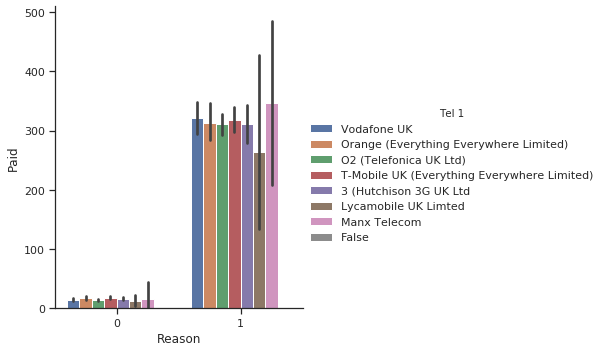

In [69]:
plt.figure(figsize=(26, 20))
sns.catplot(x="Reason", y="Paid", hue="Tel 1", kind="bar", data=df_corr)

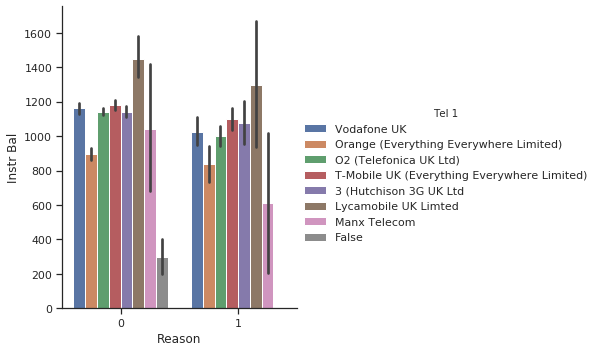

In [70]:
sns.catplot(x="Reason", y="Instr Bal", hue="Tel 1", kind="bar", data=df_corr)

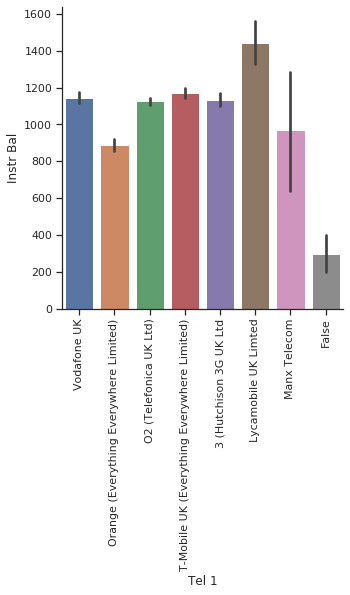

In [71]:
g=sns.catplot(x="Tel 1", y="Instr Bal", kind="bar", data=df_corr)
g.set_xticklabels(rotation=90)

## What is the most popular phone operator?

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


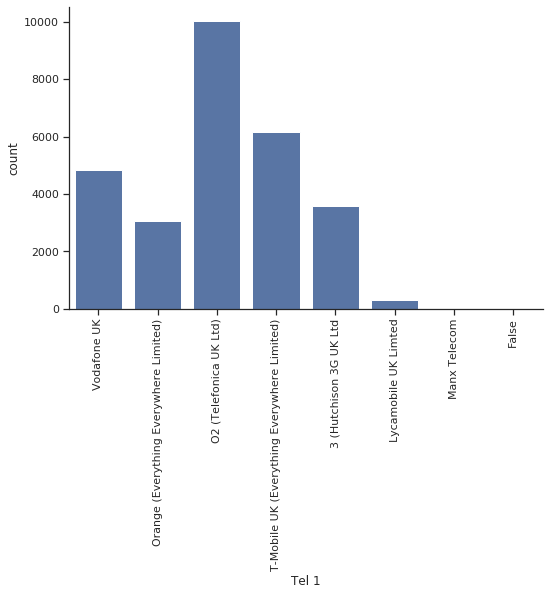

In [72]:
g = sns.factorplot("Tel 1", data=df_corr, aspect=1.5, kind="count", color="b")
g.set_xticklabels(rotation=90)

## There are 1479 different email domains. 

In [73]:
len(df_corr.Email.value_counts())

1479

## The most popular email domains are gmail.com, hotmail.co.uk, 
## hotmail.com, yahoo.co.uk and live.co.uk

In [74]:
df_corr.Email.value_counts()

gmail.com                 13956
hotmail.co.uk             12822
hotmail.com                8016
yahoo.co.uk                4122
live.co.uk                 3368
                          ...  
wilkinson-helsby.co.uk        1
altnation.com                 1
kcom.co.uk                    1
gmx.co                        1
agema-ind.com                 1
Name: Email, Length: 1479, dtype: int64

# What email users are more likely pay their debt.

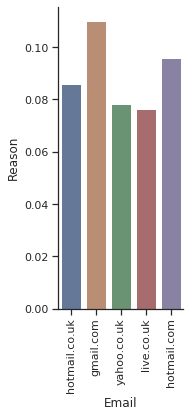

In [77]:
g = sns.catplot(x="Email", y="Reason",
                data=df_corr_dr, saturation=.5,
                 kind="bar", ci=None, aspect=.6)
g.set_xticklabels(rotation=90)

# Phone user vs Initial Balance

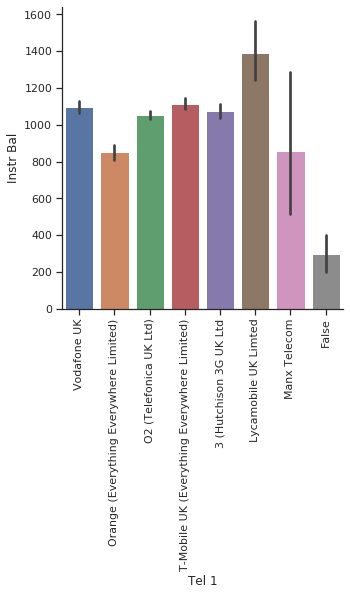

In [79]:
g=sns.catplot(x="Tel 1", y="Instr Bal", kind="bar", data=df_corr_dr)
g.set_xticklabels(rotation=90)

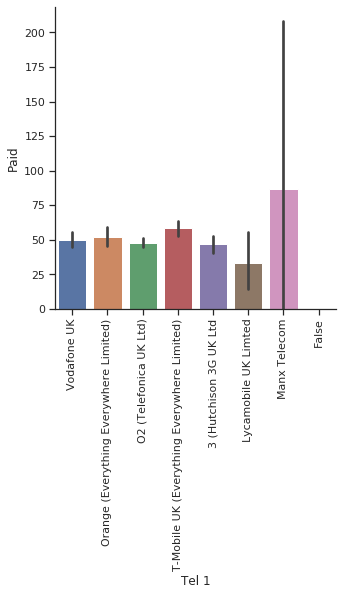

In [80]:
g=sns.catplot(x="Tel 1", y="Paid", kind="bar", data=df_corr_dr)
g.set_xticklabels(rotation=90)

## Let’s start by making a correlation matrix heatmap for the email data set.

In [0]:
df_con.to_excel('five_pop_email.xlsx')

## The most five popular email domains

## Correlation Matrix

In [91]:
df_con.corr()

,Reason,Instr Bal,Paid,Email
Reason,1.000000,-0.051981,0.613178,-0.033493
Instr Bal,-0.051981,1.000000,0.030292,-0.026791
Paid,0.613178,0.030292,1.000000,-0.021320
Email,-0.033493,-0.026791,-0.021320,1.000000


## Heat map

In [0]:
import altair as alt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Let’s start by making a correlation matrix heatmap for phone data set.

In [0]:
df=pd.read_csv('/content/email_numerical.csv')
pearsoncorr=df.corr()

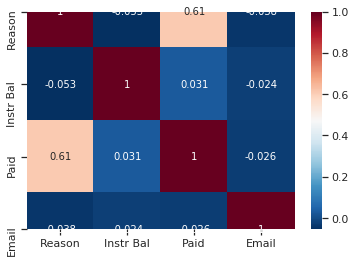

In [143]:
g=sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
          )

## How much in payments are received by month and by 'portfolio'?

### After removed all empty sells, there are 5384 rows out of over 67000

In [0]:
df_short=df_short.iloc[1:,:]
df_short.to_excel('per_month_pay.xlsx')

In [0]:
df=pd.read_csv('/content/per_m_pay.csv')

In [114]:
df.isnull().sum()

Reason           0
Instr Bal        0
Paid             0
Last Pay Dt      0
First Pay Dt     0
Tel 1            0
Email            0
diff_months      0
per_month_pay    0
dtype: int64

In [120]:
df.head()

,Reason,Instr Bal,Paid,Email
0,1,524.76,524.76,1
1,0,1198.41,0.00,0
2,1,614.20,614.20,4
3,1,530.11,690.11,4
4,0,1034.40,0.00,1


In [0]:
df=pd.read_csv('/content/phone.csv')

# What percentage of the outstanding balance of each portfolio is collected each month.

##Dividing monthly payment by the outstanding balance, we can build percentage feature

In [144]:
df=pd.read_csv('/content/per_m_pay.csv')
df['percentage']=(df['per_month_pay']/df['Instr Bal'])
df.head()

,Reason,Instr Bal,Paid,Last Pay Dt,First Pay Dt,Tel 1,Email,diff_months,per_month_pay,percentage
0,0,524.14,60.00,2018-01-03,2018-02-01,O2 (Telefonica UK Ltd),gmail.com,-0.952792,inf,inf
1,1,552.98,552.98,2017-06-27,2016-06-12,O2 (Telefonica UK Ltd),msn.com,12.484856,42.536923,0.076923
2,1,194.72,194.72,2016-12-23,2016-12-23,O2 (Telefonica UK Ltd),gmail.com,0.000000,194.720000,1.000000
3,1,876.51,876.51,2018-11-26,2017-06-25,Orange (Everything Everywhere Limited),yahoo.co.uk,17.051685,48.695000,0.055556
4,1,112.25,112.25,2016-12-23,2016-12-23,O2 (Telefonica UK Ltd),hartlepool.gov.uk,0.000000,112.250000,1.000000
